In [1]:
from sentiment_script import perform_sentiment_analysis, calculate_sentiment_dist, calculate_sentiment_dist_per_target, calculate_sentiment_over_time, calculate_sentiment_over_time_per_target, generate_word_clouds, caluclate_sentiment_dist_over_time_by_target

2024-12-02 19:48:32.666749: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-02 19:48:33.587804: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-02 19:48:34.511936: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 19:48:34.515743: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Fo

In [2]:
file_name = "../Data/ukraine_textcontain_before_new_preprocessed.csv"
dataset_name = "Ukraine before conflict"
target_entities = [
    "Russia", "Moscow", "China", "Beijing", "Ukraine",
    "Kiev", "US", "France", "West", "Joe Biden",
    "Xi Jinping", "Vladimir Putin", "Wang Yi", "Antony Blinken", "Volodymyr Zelensky",
    "Donald Trump", "Emmanuel Macron", "EU", "EU Commision", "EU Council",
    "NATO", "UN", "Covid-19", "Cold War"
]

In [3]:
tsc_results_df, vader_results_df = perform_sentiment_analysis(file_name, target_entities, dataset_name)

/home/marta/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Processing batches: 100%|██████████| 1/1 [00:00<00:00,  5.96batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  6.63batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  5.92batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  5.55batch/s]


Skipping long sentence.


Processing batches:   0%|          | 0/1 [00:00<?, ?batch/s]


TargetNotFoundException: US not found in the international center for not-for-profit law (icnl) estimates there are 38,000 active ngos in kazakhstan while the majority of them  ̶  some say around 20,000  ̶  are funded by us and european countries by way of grants and donations, including the us agency for international development (usaid), the national endowment for democracy (ned), and freedom house.


Processing batches:   0%|          | 0/1 [00:00<?, ?batch/s]


TargetNotFoundException: EU not found in the international center for not-for-profit law (icnl) estimates there are 38,000 active ngos in kazakhstan while the majority of them  ̶  some say around 20,000  ̶  are funded by us and european countries by way of grants and donations, including the us agency for international development (usaid), the national endowment for democracy (ned), and freedom house.


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  6.10batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  5.81batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  7.18batch/s]


Skipping long sentence.


Processing batches:   0%|          | 0/1 [00:00<?, ?batch/s]


TargetNotFoundException: UN not found in according to statistics from the office of foreign assets control (ofac) of the us department of the treasury, as of 19 october 2021, a total of 391 entities and individuals from china (including hong kong and macao) have been sanctioned by the us.in an article published in the september/october 2021 issue of foreign affairs, daniel drezner, professor at tufts university and senior fellow at the brookings institution, criticizes successive us administrations for using "sanctions as the go-to solution for nearly every foreign policy problem."


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  7.19batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  7.18batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  7.20batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  7.42batch/s]


       Negative  Neutral  Positive
TSC        4122    14757      2447
VADER      4147     2947      4166


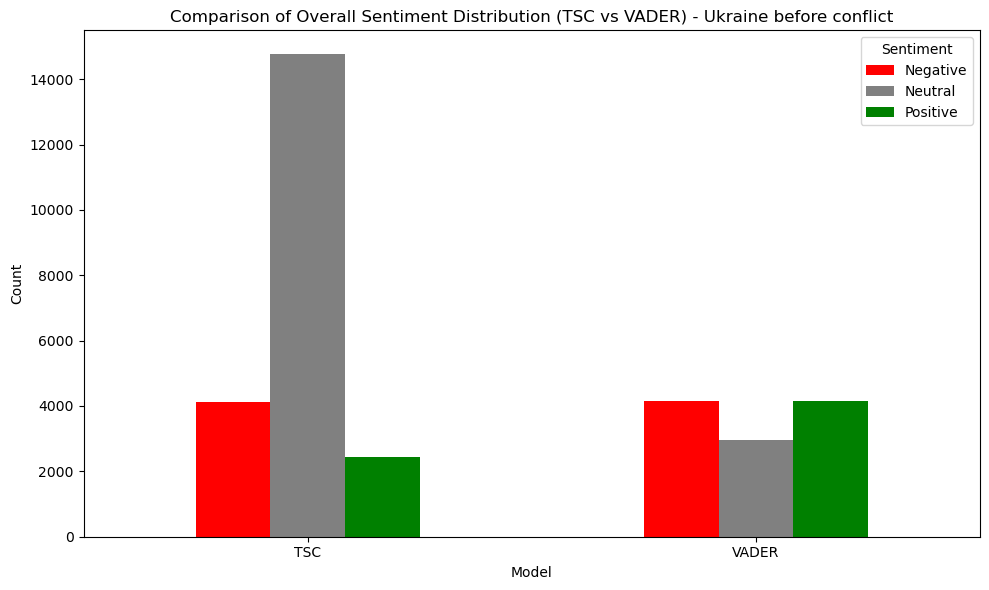

In [4]:
calculate_sentiment_dist(tsc_results_df, vader_results_df, dataset_name)

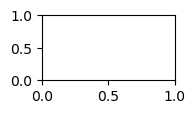

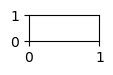

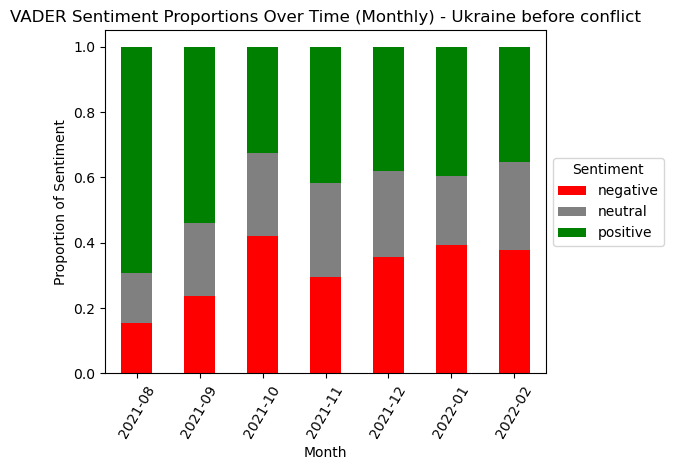

In [5]:
calculate_sentiment_over_time(tsc_results_df, vader_results_df, dataset_name)

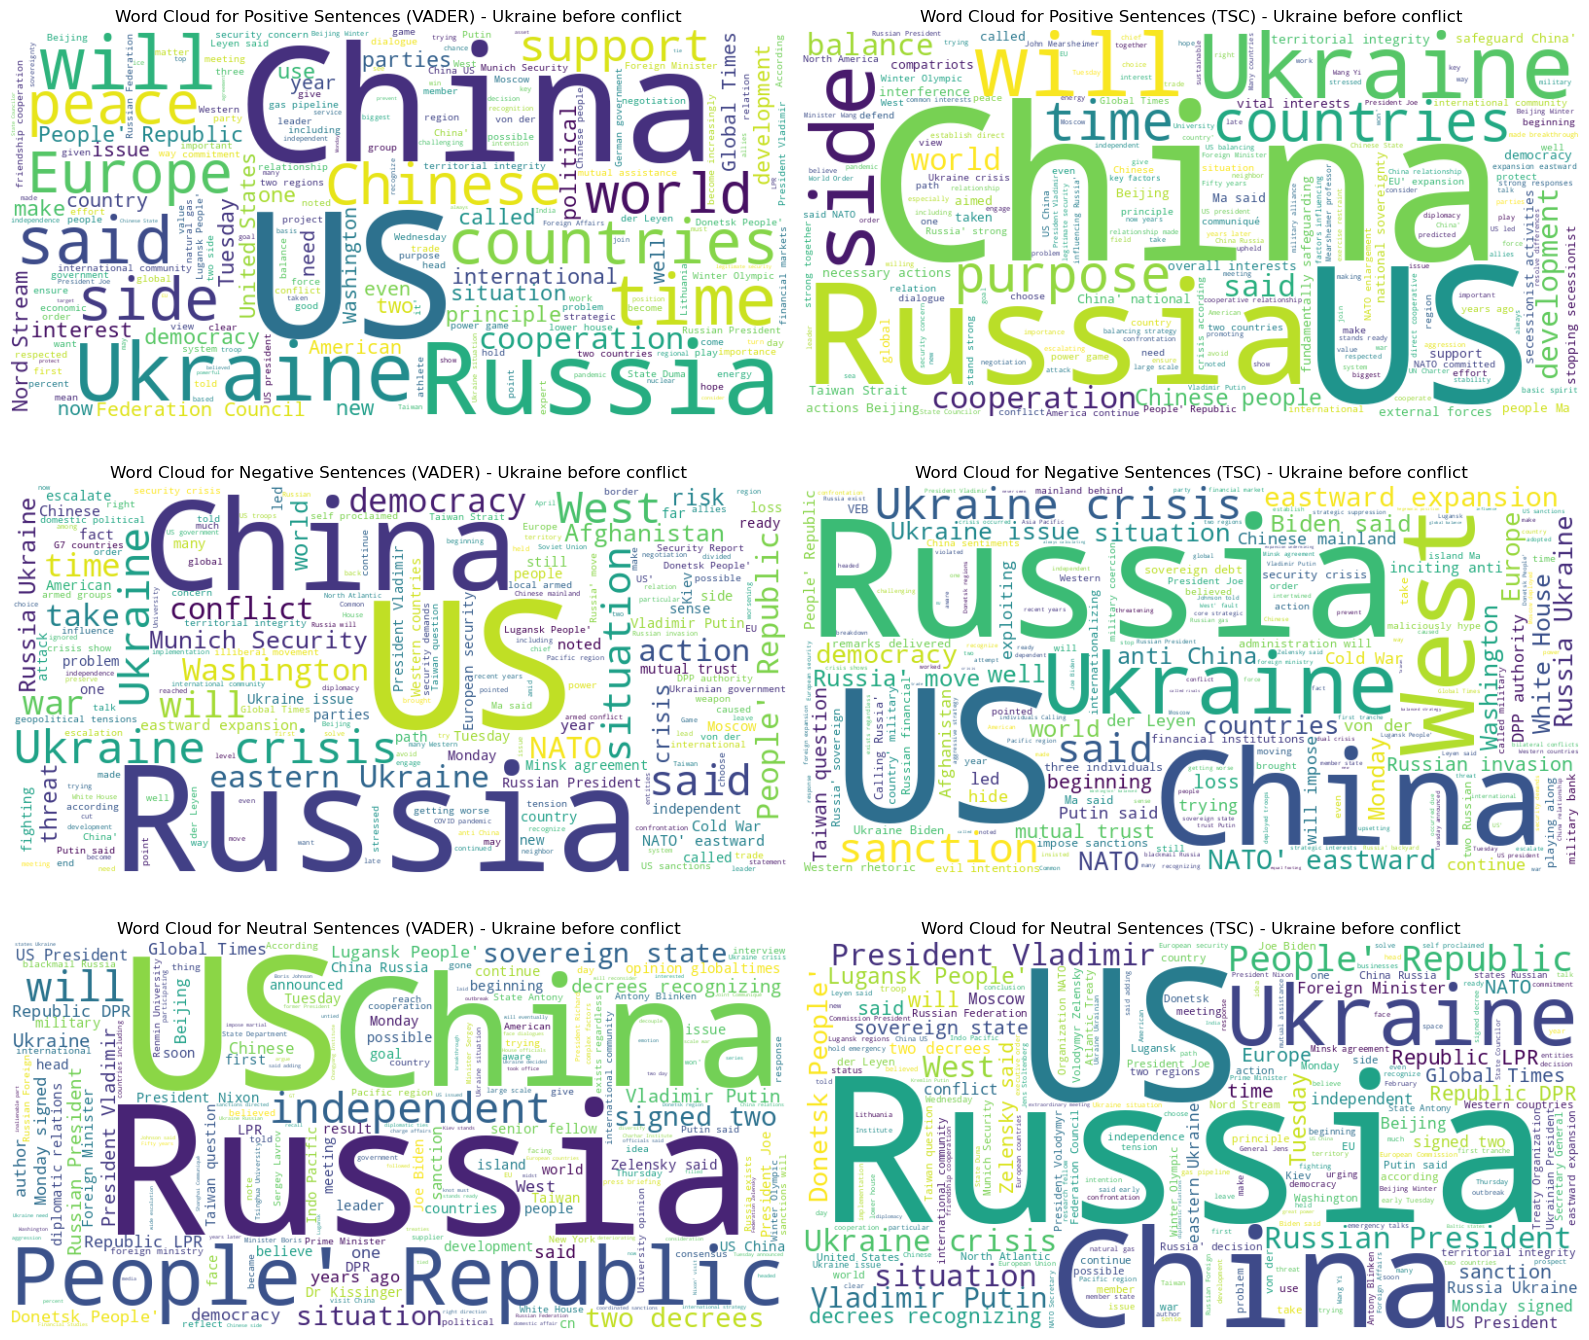

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
def clean_sentences(df, sentiment_label):
    sentences = df[df['Sentiment'] == sentiment_label]['Sentence']
    sentences = " ".join(sentences)
    sentences = re.sub(r'\b[a-zA-Z]\b', '', sentences)
    sentences = re.sub(r'\s+', ' ', sentences).strip()
    return sentences


# generate word cloud for VADER sentiment (positive, negative, neutral)
def wc_vader(sentiment_label, df, dataset_name: str):
    sentences = clean_sentences(df, sentiment_label)
    if sentences:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentences)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentences (VADER) - {dataset_name}')


# generate word cloud for TSC sentiment (positive, negative, neutral)
def wc_tsc(sentiment_label, df, dataset_name: str):
    sentences = clean_sentences(df, sentiment_label)
    if sentences:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentences)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentences (TSC) - {dataset_name}')


def generate_word_clouds_2(tsc_results_df: pd.DataFrame, vader_results_df: pd.DataFrame, dataset_name: str):
    plt.figure(figsize=(16, 14))
    plt.subplot(3, 2, 1)
    wc_vader('positive', vader_results_df, dataset_name)
    plt.subplot(3, 2, 3)
    wc_vader('negative', vader_results_df, dataset_name)
    plt.subplot(3, 2, 5)
    wc_vader('neutral', vader_results_df, dataset_name)

    plt.subplot(3, 2, 2)
    wc_tsc('positive', tsc_results_df, dataset_name)
    plt.subplot(3, 2, 4)
    wc_tsc('negative', tsc_results_df, dataset_name)
    plt.subplot(3, 2, 6)
    wc_tsc('neutral', tsc_results_df, dataset_name)
    plt.tight_layout()
    plt.savefig(f"Plots/sentiment_wordclouds_{dataset_name}.png")
    plt.show()

generate_word_clouds_2(tsc_results_df, vader_results_df, dataset_name)

Sentiment           negative  neutral  positive
Target                                         
Antony Blinken             0       51         4
Beijing                   24      249        63
China                    360     1208       441
Cold War                  69       30         0
Covid-19                  48       68         9
Donald Trump               8        6         3
EU                        63      957       134
EU Council                 0        1         0
Emmanuel Macron            0        9         2
France                     5       51        12
Joe Biden                  3       57        45
Kiev                      35       93        31
Moscow                    64      151        17
NATO                     134      507        83
Russia                  1607     1135       247
UN                       371     2908       576
US                       869     4772       639
Ukraine                  235     1596        51
Vladimir Putin            37      182   

<Figure size 1200x800 with 0 Axes>

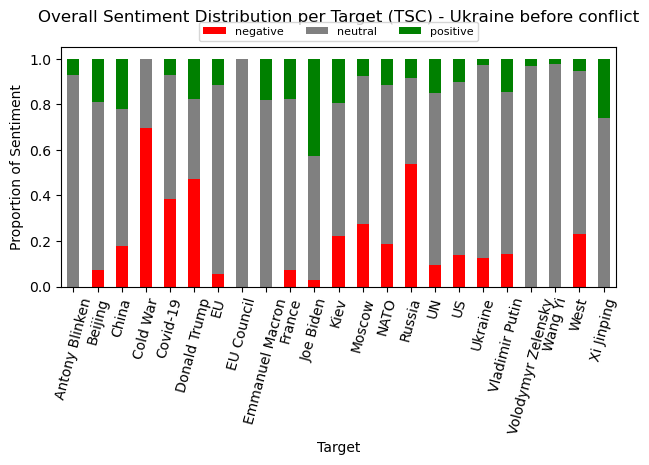

In [12]:
calculate_sentiment_dist_per_target(tsc_results_df, dataset_name)

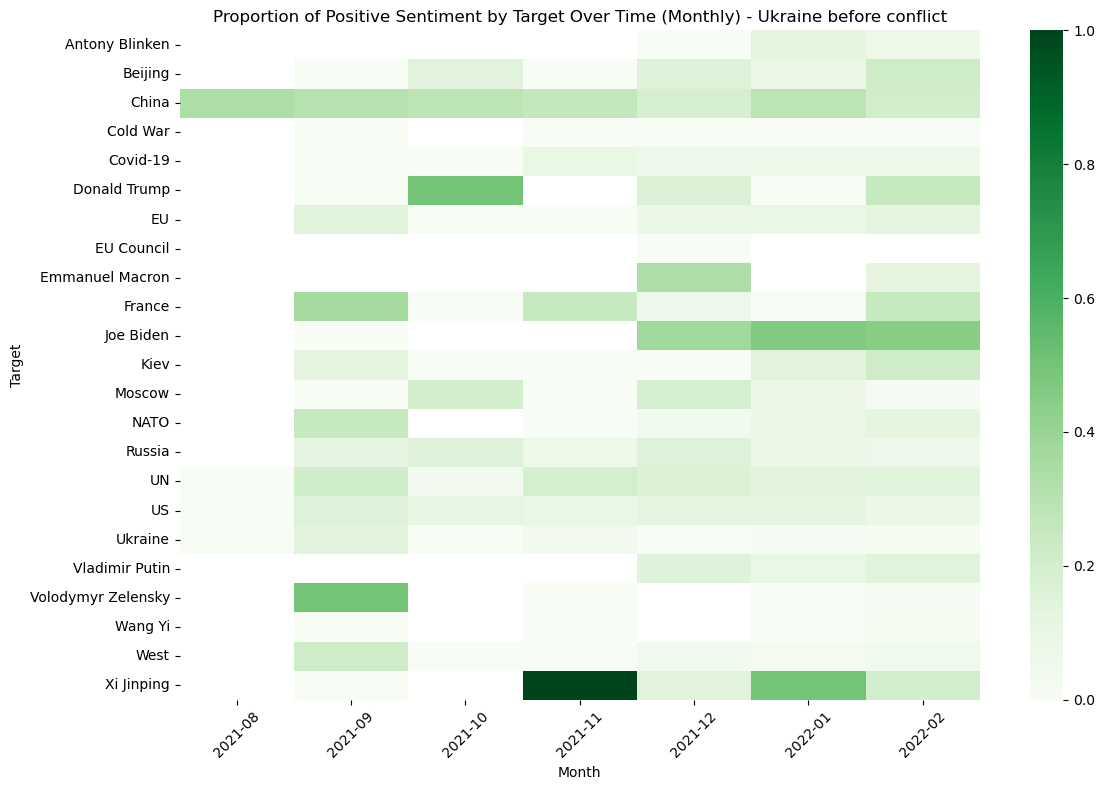

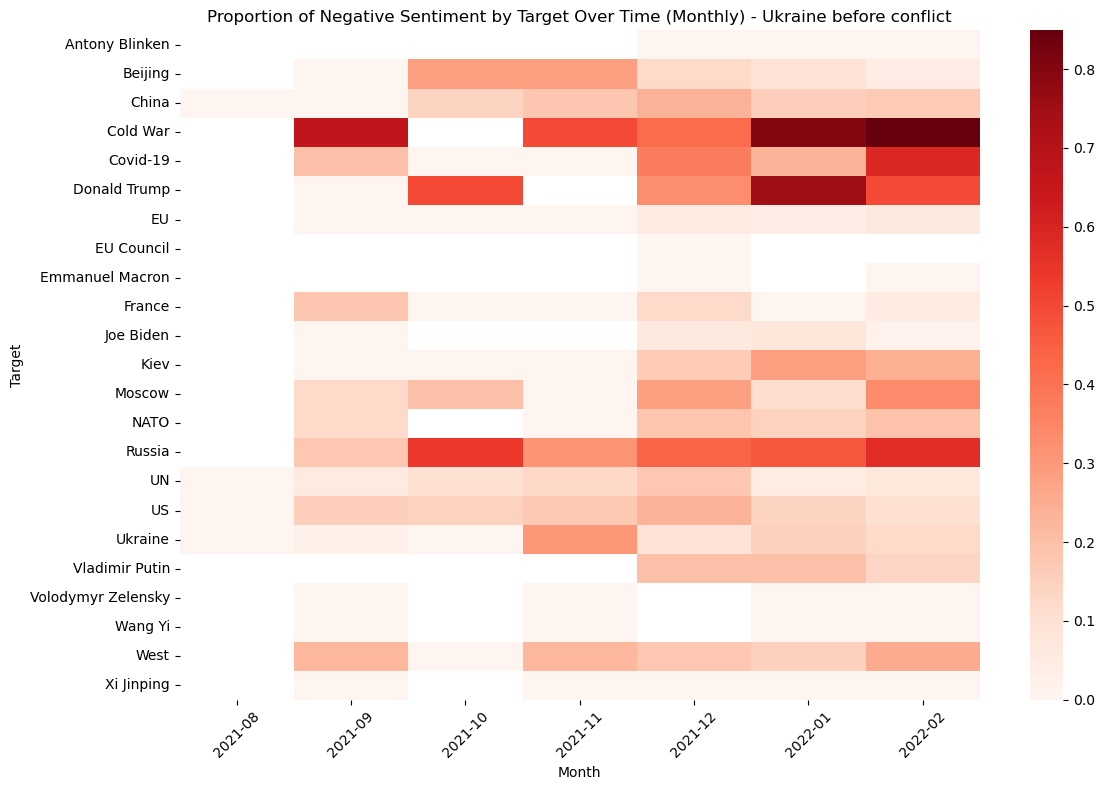

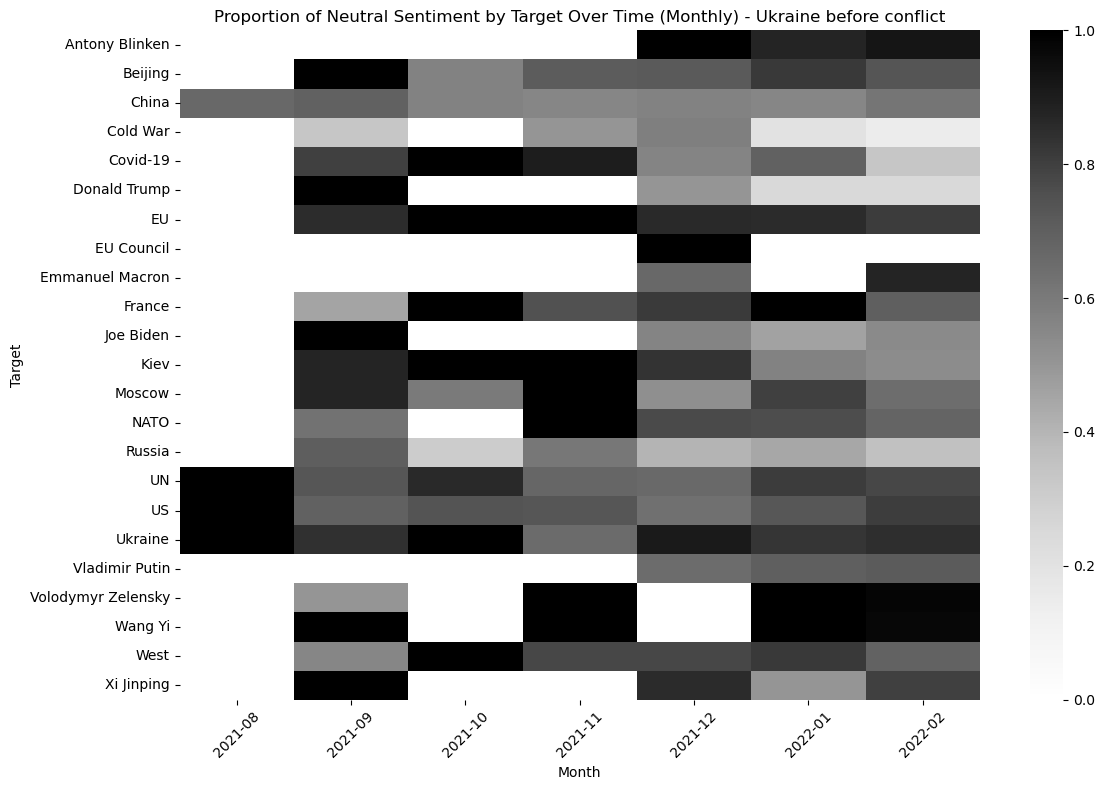

In [13]:
caluclate_sentiment_dist_over_time_by_target(tsc_results_df, dataset_name)